# Samver Jahan Mormo
---
Department of Computer Science & Engineering,

Rajshahi University of Engineering & Technology (RUET)

Linkedin: https://www.linkedin.com/in/samver-jahan-mormo/

Email: sjm91097@gmail.com

---



Logistic Regression is a type of classification algorithm that involves predicting the outcome of an event, such as whether a passenger will survive the Titanic disaster or not.

Dataset link: [Kaggle](https://www.kaggle.com/c/titanic/data)

In [1]:
! unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [55]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

## Dropping Unnecessary Columns

In [56]:
df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Cabin', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Drop rows with missing data, re-index the data frame

In [57]:
df = df.dropna() # drop rows with NaN
df = df.reset_index(drop=True)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,1,male,54.0,0,0,51.8625,S
6,0,3,male,2.0,3,1,21.0750,S
7,1,3,female,27.0,0,2,11.1333,S
8,1,2,female,14.0,1,0,30.0708,C
9,1,3,female,4.0,1,1,16.7000,S


## Encoding the Non-Numeric Fields (Sex, Embarked)

In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

sex_encode = label_encoder.fit_transform(df['Sex'])
df['Sex'] = sex_encode

embarked_encode = label_encoder.fit_transform(df['Embarked'])
df['Embarked'] = embarked_encode

df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,1,1,54.0,0,0,51.8625,2
6,0,3,1,2.0,3,1,21.0750,2
7,1,3,0,27.0,0,2,11.1333,2
8,1,2,0,14.0,1,0,30.0708,0
9,1,3,0,4.0,1,1,16.7000,2


## Indicate the categorical columns

In [59]:
df['Pclass'] = pd.Categorical(df['Pclass'])
df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Survived'] = pd.Categorical(df['Survived'])

df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

# Splitting the Dataset into Train and Test Sets

In [60]:
X = df.iloc[:, 1:]
y = df['Survived']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify = df["Survived"])

print(X_train.head())
print(y_train)

print(X_test.head())
print(y_test)

    Pclass Sex   Age  SibSp  Parch     Fare Embarked
514      3   1  21.0      0      0   8.4333        2
382      3   1   9.0      5      2  46.9000        2
285      1   0  22.0      0      1  55.0000        2
142      2   1  30.0      0      0  13.0000        2
671      3   1  34.5      0      0   6.4375        0
514    0
382    0
285    1
142    0
671    0
      ..
525    0
331    1
682    1
212    0
691    0
Name: Survived, Length: 534, dtype: category
Categories (2, int64): [0, 1]
    Pclass Sex   Age  SibSp  Parch     Fare Embarked
227      3   1  19.0      0      0   8.0500        2
318      2   1  46.0      0      0  26.0000        2
538      3   1  20.0      0      0   9.2250        2
199      1   1  37.0      1      1  52.5542        2
235      2   1  36.0      0      0  12.8750        0
227    1
318    0
538    0
199    1
235    0
      ..
631    0
237    0
436    1
639    1
35     0
Name: Survived, Length: 178, dtype: category
Categories (2, int64): [0, 1]


# Train the model - Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

## Fit

In [65]:
model.fit(X_train, y_train)

LogisticRegression()

## Check model intercept & coefficients

In [66]:
# Check trained model intercept
print(model.intercept_)
# Check trained model coefficients
print(model.coef_)

[5.71741985]
[[-1.24711784e+00 -2.50447823e+00 -5.02878352e-02 -3.46390948e-01
  -8.60832355e-03  8.96599231e-04 -1.42842354e-01]]


## Predict

In [67]:
preds = model.predict(X_test)
preds

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1])

## Predict the probabilities

In [68]:
pred_probs = model.predict_proba(X_test)
pred_probs

array([[0.85350347, 0.14649653],
       [0.8649361 , 0.1350639 ],
       [0.85955299, 0.14044701],
       [0.6197271 , 0.3802729 ],
       [0.74651526, 0.25348474],
       [0.02070792, 0.97929208],
       [0.02630916, 0.97369084],
       [0.65299616, 0.34700384],
       [0.89697916, 0.10302084],
       [0.86479565, 0.13520435],
       [0.9491776 , 0.0508224 ],
       [0.8597013 , 0.1402987 ],
       [0.61758076, 0.38241924],
       [0.03257368, 0.96742632],
       [0.79173822, 0.20826178],
       [0.91616361, 0.08383639],
       [0.96644449, 0.03355551],
       [0.28176469, 0.71823531],
       [0.67518212, 0.32481788],
       [0.3951085 , 0.6048915 ],
       [0.88396945, 0.11603055],
       [0.85978824, 0.14021176],
       [0.35292484, 0.64707516],
       [0.75302321, 0.24697679],
       [0.92171181, 0.07828819],
       [0.9073254 , 0.0926746 ],
       [0.88226072, 0.11773928],
       [0.45276296, 0.54723704],
       [0.17637603, 0.82362397],
       [0.91471807, 0.08528193],
       [0.

## Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm

array([[90, 16],
       [20, 52]])

## Accuracy

In [70]:
model.score(X_test, y_test)

0.797752808988764

## The metrics module also allows to generate the other metrics such as precision, recall, and f1-score:

In [74]:
# from sklearn import metrics
# metrics.classification_report(X_test, preds)

## Receiver Operating Characteristic (ROC) Curve

Another metric that's very useful to determine whether your model is well fitted is the Receiver Operating Characteristic (ROC) curve. The metrics module has the roc_curve() function that helps you to generate a ROC curve, as well as the auc() function that calculates the area under the ROC curve.

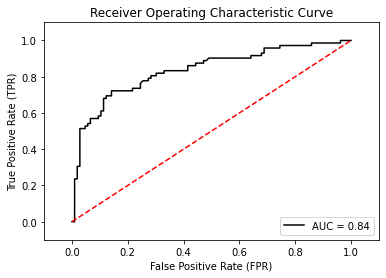

[0.         0.00943396 0.00943396 0.01886792 0.01886792 0.02830189
 0.02830189 0.04716981 0.04716981 0.05660377 0.05660377 0.06603774
 0.06603774 0.09433962 0.09433962 0.10377358 0.10377358 0.11320755
 0.11320755 0.12264151 0.12264151 0.14150943 0.14150943 0.21698113
 0.21698113 0.24528302 0.24528302 0.25471698 0.27358491 0.27358491
 0.28301887 0.28301887 0.30188679 0.30188679 0.33018868 0.33018868
 0.41509434 0.41509434 0.4245283  0.44339623 0.44339623 0.47169811
 0.47169811 0.48113208 0.49056604 0.64150943 0.64150943 0.67924528
 0.67924528 0.68867925 0.68867925 0.74528302 0.74528302 0.80188679
 0.82075472 0.85849057 0.85849057 0.96226415 0.96226415 1.        ]
[0.         0.         0.23611111 0.23611111 0.30555556 0.30555556
 0.51388889 0.51388889 0.52777778 0.52777778 0.54166667 0.54166667
 0.56944444 0.56944444 0.58333333 0.58333333 0.61111111 0.61111111
 0.68055556 0.68055556 0.69444444 0.69444444 0.72222222 0.72222222
 0.73611111 0.73611111 0.76388889 0.77777778 0.77777778 0.791

In [81]:
from sklearn.metrics import roc_curve, auc

# convert the probabilities from ndarray to
# dataframe
df_prob = pd.DataFrame(pred_probs, columns=['Death', 'Survived'])

fpr, tpr, thresholds = roc_curve(y_test, df_prob['Survived'])

# find the area under the curve (auc) for the ROC
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'black', label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

print(fpr) # Increasing false positive rates such
           # that element i is the false positive
           # rate of predictions with score >= thresholds[i].
print(tpr) # Increasing true positive rates such
           # that element i is the true positive
           # rate of predictions with score >= thresholds[i].

print(thresholds)
